In [2]:
import pandas as pd
file="/kaggle/input/imdb-movies-data/imdb-movies-dataset.csv"
imdb_data=pd.read_csv(file)



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

imdb_data=imdb_data[["Rating","Metascore","Votes","Review Count"]].dropna()

imdb_data["Votes"] = imdb_data["Votes"].astype(str).str.replace(",", "").astype(int)
imdb_data["Review Count"] = imdb_data["Review Count"].astype(str).str.replace(",", "").astype(int)

X=imdb_data[["Rating","Metascore","Review Count"]]
y=imdb_data["Votes"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

imdb_model=LinearRegression()
imdb_model.fit(X_train,y_train)

y_pred=imdb_model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
print(f"Mean absolute error: {mae:.2f}")


Mean absolute error: 78064.10


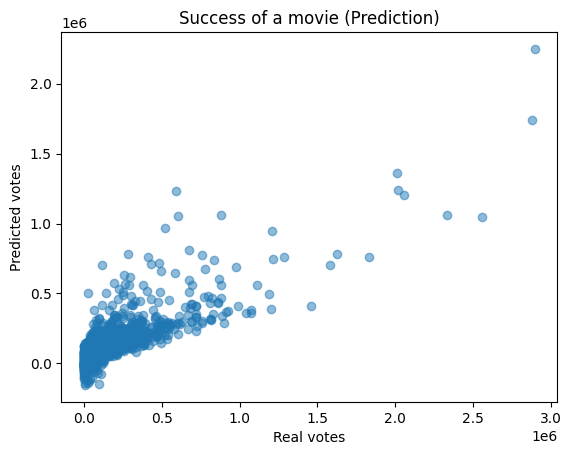

In [7]:
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel("Real votes")
plt.ylabel("Predicted votes")
plt.title("Success of a movie (Prediction)")
plt.show()